In [286]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
import plotly



In [144]:
data=pd.read_csv('Life expectancy.csv')

In [145]:
#getting basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           3253 non-null   object 
 1   Year             3253 non-null   int64  
 2   Life expectancy  3253 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.4+ KB


In [146]:
data.describe(include='all')

,Entity,Year,Life expectancy
count,3253,3253.000000,3253.000000
unique,15,NaN,NaN
top,United States,NaN,NaN
freq,217,NaN,NaN
mean,NaN,1908.066093,48.680380
std,NaN,62.613962,17.965669
min,NaN,1800.000000,8.108836
25%,NaN,1854.000000,32.000000
50%,NaN,1908.000000,41.880001
75%,NaN,1962.000000,66.820000


In [147]:
data.isnull().sum()

Entity             0
Year               0
Life expectancy    0
dtype: int64

In [262]:
data['Year'].unique()

array([1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867,
       1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
       1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
       1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900,
       1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 19

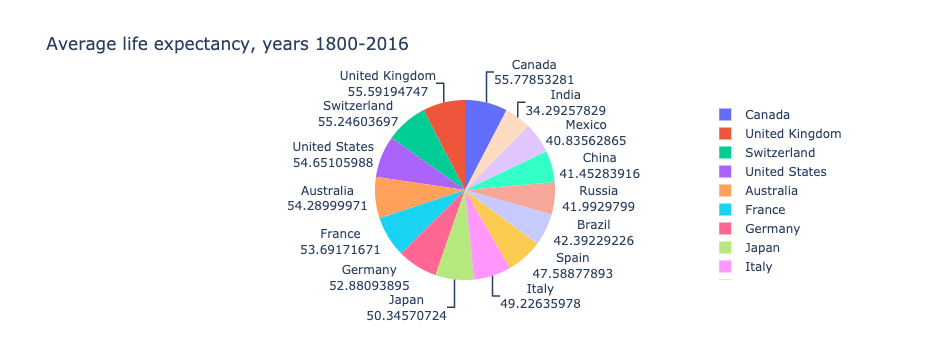

In [148]:
country=data.groupby('Entity')['Life expectancy'].mean()
colors = sns.color_palette('mako')
fig= px.pie(country, names= country.index,values=country.values,title=' Average life expectancy, years 1800-2016')
fig.update_traces(hoverinfo='label+percent',textinfo='label+value')

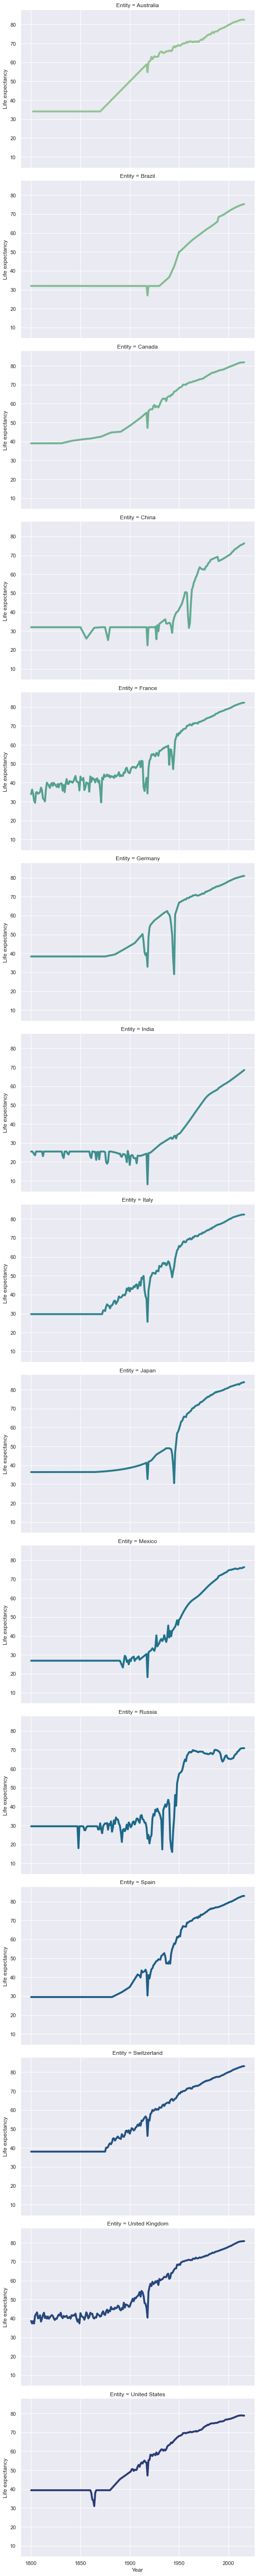

In [190]:


fig=sns.relplot(data=data,x=data['Year'],y=data['Life expectancy'],hue=data['Entity'],kind='line',palette='crest',linewidth=4,aspect=1.5,legend=False,row=data['Entity'],dashes='True')
sns.set_theme(rc = {'figure.figsize':(5,1)},font_scale=1)
for country, ax in data.axes_dict.items()



Text(0.5, 1.0, 'Life expectancy 1800-2018')

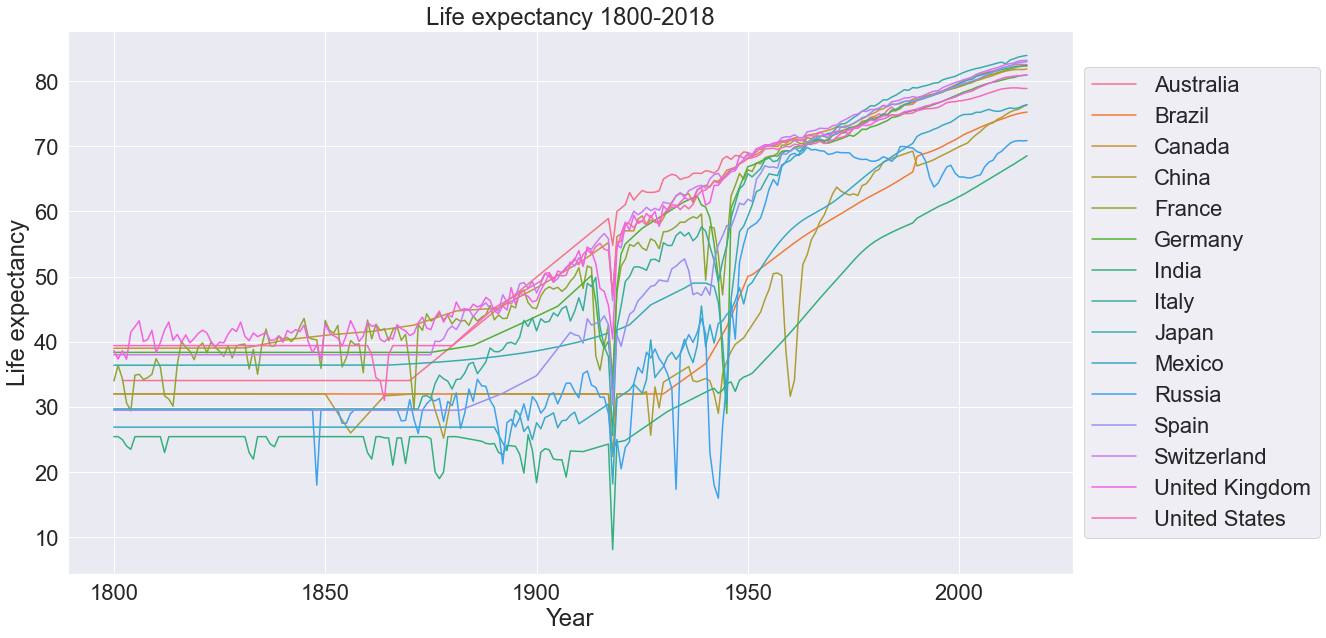

In [185]:
fig2=sns.lineplot(data=data, x=data['Year'], y=data['Life expectancy'],units=data['Entity'],estimator=None,legend='auto',hue=data['Entity'])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),ncol=1)
sns.set(rc = {'figure.figsize':(18,10)},font_scale=2)
fig2.set_title('Life expectancy 1800-2018')

In [308]:
#Sorting values to get the highest and lowest Life expectancy score
max=data.groupby('Entity').sum()
max.sort_values(by='Life expectancy',ascending=False)


,Year,Life expectancy
Entity,,
Canada,414036,12103.941619
United Kingdom,414036,12063.452602
Switzerland,414036,11988.390022
United States,414036,11859.279993
Australia,410435,11672.349938
France,414036,11651.102525
Germany,414036,11475.163753
Japan,414036,10925.018470
Italy,414036,10682.120072


In [309]:
#creating df for the country with highest and lowest life expectancy
maxmin=data[(data['Entity']=='Canada')|(data['Entity']=='India')]

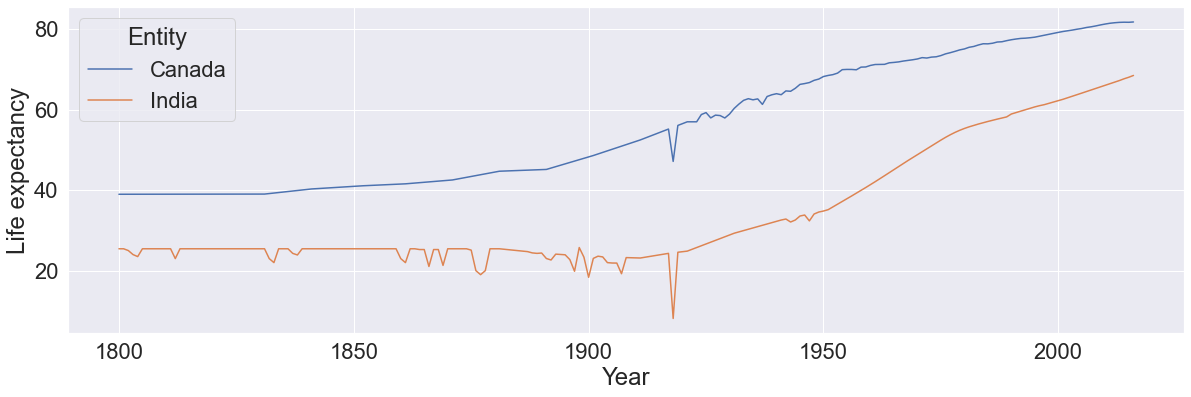

In [310]:
plt.figure(figsize=(20,6))
fig=sns.lineplot(data=maxmin,x='Year',y='Life expectancy',hue='Entity')
sns.set(font_scale=2)

In [ ]:
px.scatter_geo

In [304]:
#applying ISO alpha codes to countries to create map
def geo_info (row):
    if row['Entity']=='Australia':
        return 'AUS'
    if row['Entity']=='Brazil':
        return 'BRA'
    if row['Entity']=='Canada':
        return 'CAN'
    if row['Entity']=='China':
        return 'CHN'
    if row['Entity']=='France':
        return'FRA'
    if row['Entity']=='Germany':
        return 'DEU'
    if row['Entity']=='India':
        return 'IND'
    if row['Entity']=='Japan':
        return 'JPN'
    if row['Entity']=='Mexico':
        return 'MEX'
    if row['Entity']=='Russia':
        return 'RUE'
    if row['Entity']=='Spain':
        return 'ESP'
    if row['Entity']=='Switzerland':
        return  'CHE'
    if row['Entity']=='United Kindgom':
        return 'GBR'
    if row['Entity']=='United States':
        return'USA'
    if row['Entity']=='Italy':
        return 'ITA'
    return 'Other'



In [312]:
#choosing data only for the recent year
data['geo']=data.apply(geo_info,axis=1)
data.head()
y2018=data[(data['Year']==2016)]
y2018.head(10)

,Entity,Year,Life expectancy,geo
214,Australia,2016,82.519997,AUS
431,Brazil,2016,75.239998,BRA
648,Canada,2016,81.849998,CAN
865,China,2016,76.360001,CHN
1082,France,2016,82.339996,FRA
1299,Germany,2016,80.930000,DEU
1516,India,2016,68.550003,IND
1733,Italy,2016,82.339996,ITA
1950,Japan,2016,83.940002,JPN
2167,Mexico,2016,76.379997,MEX


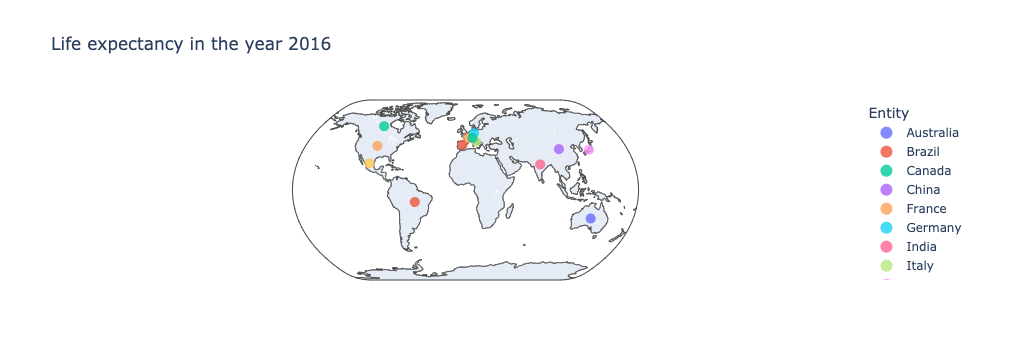

In [315]:
map_fig=px.scatter_geo(y2018,
                       locations='geo',
                       color='Entity',
                       opacity=.8,
                       size='Life expectancy',
                       projection='natural earth',
                      title='Life expectancy in the year 2016')
map_fig.update_traces(marker_size=10)


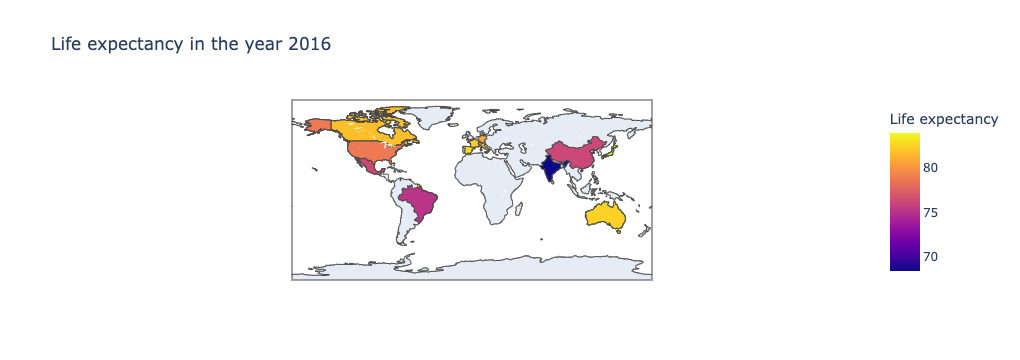

In [316]:
mapafig=px.choropleth(y2018, locations='geo',color='Life expectancy', hover_name='Entity',color_continuous_scale=px.colors.sequential.Plasma,title='Life expectancy in the year 2016')
mapafig.show()